In [1]:
import os
import sys
import struct
import pprint
import matplotlib
import matplotlib.pyplot as plt
import pickle
import math
import time
import statistics
import numpy as np
from TraceInc import AutoDict
%pylab inline

type_enum = {
   0 : "Load",
   1 : "Store"
}
pp = pprint.PrettyPrinter(indent=2)

Populating the interactive namespace from numpy and matplotlib


In [2]:
files = ['hs2d', 'hs3d','hist', 'nbody', 'path', 'bfs']

In [3]:
binArray = [1,2,4,8,16,64,128,256,512,768,1024,10000,100000]

In [4]:
dSet = AutoDict()
for app in files:
    rangeSet = pickle.load( open('../data/'+app+'.addrmap', "rb"))
    for k in rangeSet:
        for cta in sorted(rangeSet[k].keys()):
            for it in rangeSet[k][cta]:
                for ty in rangeSet[k][cta][it]:
                    prev = min(rangeSet[k][cta][it][ty])
                    for addr in sorted(rangeSet[k][cta][it][ty])[1::]:
                        stride = addr - prev
                        prev = addr
                        if not dSet[app][ty]:
                            dSet[app][ty] = []
                        dSet[app][ty].append(stride)

In [5]:
sweepLoad = {}
sweepStore= {}
pp.pprint(dSet.keys())
for n in binArray:
    sweepLoad[n] = []
    sweepStore[n] = []
for app in files:
    (cnt, bins,_) = hist(dSet[app][0], bins=binArray)
    for i,n in enumerate(cnt):
        sweepLoad[binArray[i]].append((n/sum(cnt))*100)
    (cnt1, bins1,_) = hist(dSet[app][1], bins=binArray)
    for i,n in enumerate(cnt1):
        sweepStore[binArray[i]].append((n/sum(cnt1))*100)
plt.clf()

dict_keys(['hist', 'nbody', 'hs2d', 'hs3d', 'path', 'bfs'])


In [6]:
pp.pprint(sweepLoad)
pp.pprint(sweepStore)

{ 1: [0.0, 0.0, 0.0, 0.0, 0.0, 22.079517815597967],
  2: [0.0, 0.0, 0.0, 0.0, 0.0, 15.578745699283669],
  4: [ 75.614267641766673,
       93.99671052631578,
       0.0,
       99.932315814409961,
       99.164384977010897,
       8.552918225604337],
  8: [0.0, 0.0, 0.0, 0.0, 0.0, 4.9975075971528868],
  16: [10.580271865407974, 0.0, 0.0, 0.0, 0.0, 5.1835473763902362],
  64: [0.0, 0.0, 0.0, 0.0, 0.00064576122333006149, 2.3855995224995263],
  128: [0.0, 0.0, 0.0, 0.0, 0.0, 3.3464391166566507],
  256: [0.0, 2.2556390977443606, 100.0, 0.0, 0.0, 5.4206224582979941],
  512: [0.0, 0.0, 0.0, 0.0, 0.0, 4.5192427323891202],
  768: [0.0, 0.0, 0.0, 0.0, 0.83496926176576947, 3.8223782808844495],
  1024: [ 13.805460492825352,
          3.7476503759398496,
          0.0,
          0.067684185590036888,
          0.0,
          22.429934205443928],
  10000: [0.0, 0.0, 0.0, 0.0, 0.0, 1.6835469697992336],
  100000: []}
{ 1: [0.0, 0.0, 0.0, 0.0, 0.0, 21.998722123196565],
  2: [0.0, 0.0, 0.0, 0.0, 0.0, 25.

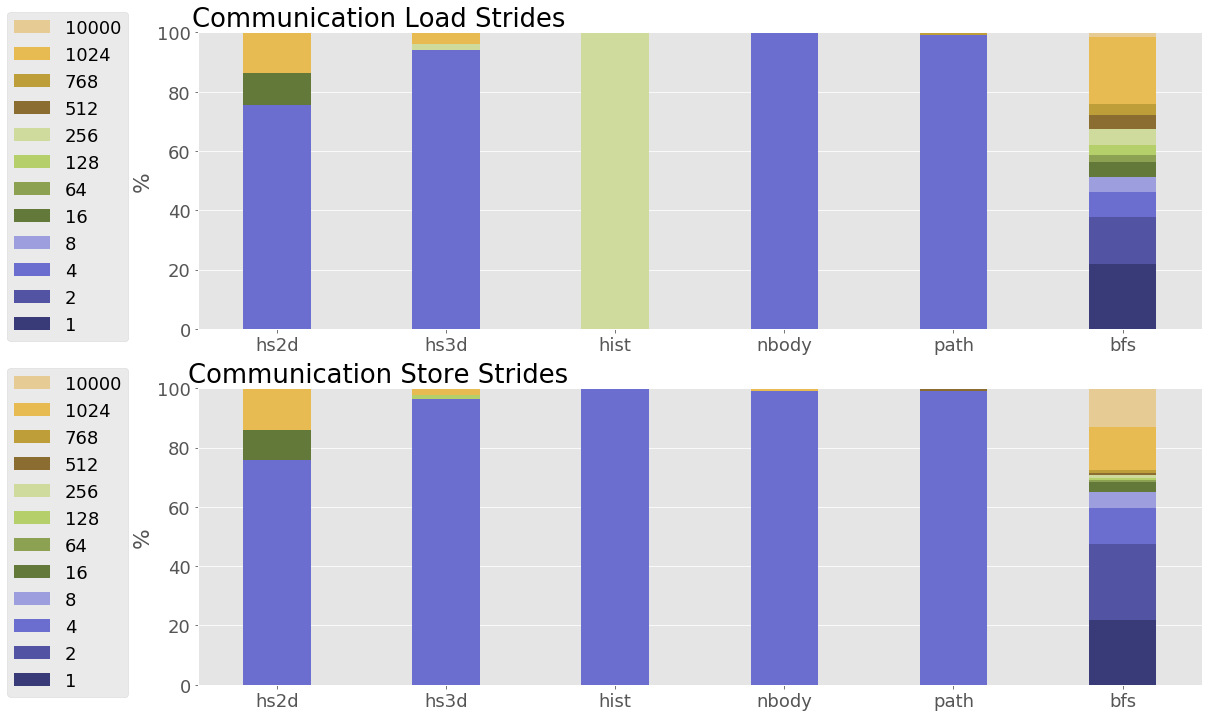

In [14]:
pylab.rcParams['figure.figsize'] = (18, 12)
plt.style.use('ggplot')

matplotlib.rcParams.update({'font.size': 18})
cmap = matplotlib.cm.get_cmap('tab20b')
c = cmap.colors

ind = np.arange(len(files))
width = 0.4
plt.subplot(211)
bottom = np.zeros(len(files))
for (inx,key) in enumerate(binArray[0:-1]):
    plt.bar(ind,sweepLoad[key], label=str(key), width=width, bottom=bottom, color=c[inx])
    bottom += np.array(sweepLoad[key])
#plt.xlabel('Transaction Members')
plt.ylabel('%')
plt.title('Communication Load Strides', x=0.18)
plt.xticks(ind, files)
ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], bbox_to_anchor=(-0.06,1.1))

plt.subplot(212)
bottom=np.zeros(len(files))
for (inx,key) in enumerate(binArray[0:-1]):
    plt.bar(ind,sweepStore[key], label=str(key), width=width, bottom=bottom,color=c[inx])
    bottom += np.array(sweepStore[key])
plt.xticks(ind, files)
ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], bbox_to_anchor=(-0.06,1.1))#plt.xlabel('Transaction Members')
plt.ylabel('%')
plt.title('Communication Store Strides', x=0.18)
filename = '../plots/strides.pdf'
plt.savefig(filename, papertype='a4', bbox_inches='tight', orientation='landscape')
plt.show()